## Example python implementation for KNN purity score

In [1]:

import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Function import knn_purity, proliferation_purity
import scipy 

In [2]:
import scvelo as scv

In [3]:
gastrulation =sc.read_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/gastrulation.h5ad')
forebrain= sc.read_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/forebrain.h5ad')
bonemarrow= sc.read_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/bonemarrow.h5ad')
iPSC= sc.read_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/iPSC.h5ad')
pancreas= sc.read_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/pancreas.h5ad')
pbmc10k= sc.read_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/pbmc10k.h5ad')
pbmc3k= sc.read_h5ad('/home/jupyter/GPLVM_Shaista/Benchmarking/pbmc3k.h5ad')

In [4]:
forebrain.obs['celltype']=forebrain.obs['Clusters']
pancreas.obs['celltype']=pancreas.obs['clusters']
bonemarrow.obs['celltype']=bonemarrow.obs['clusters']
pancreas.obs['celltype']=pancreas.obs['clusters']
pbmc10k.obs['celltype']=pbmc10k.obs['predicted.celltype.l2']
pbmc3k.obs['celltype']=pbmc3k.obs['predicted.celltype.l2']

In [103]:
datasets=[ pancreas, forebrain, bonemarrow, pbmc10k, pbmc3k]
for i in range(len(datasets)):
    knn_purity(datasets[i], "X_umap_pca", 'celltype')
    knn_purity(datasets[i], "X_umap_gplvm_random", 'celltype')
    knn_purity(datasets[i], "X_umap_gplvm_PC", 'celltype')


CellCycle Purity- PLk1 in forebrain and pancreas--  Mphase

In [63]:
datasets1=[ pancreas]
datasets2=[forebrain]
for i in range(len(datasets1)):
    proliferation_purity(datasets1[i], "X_umap_pca", 'Plk1')
    proliferation_purity(datasets1[i], "X_umap_gplvm_random", 'Plk1')
    proliferation_purity(datasets1[i], "X_umap_gplvm_PC", 'Plk1')
for i in range(len(datasets2)):
    proliferation_purity(datasets2[i], "X_umap_pca", 'PLK1')
    proliferation_purity(datasets2[i], "X_umap_gplvm_PC", 'PLK1')
    proliferation_purity(datasets2[i], "X_umap_gplvm_random", 'PLK1')



In [64]:
forebrain.obs['celltype'] = pd.Categorical(forebrain.obs.celltype)
(forebrain.obs.dtypes)

Clusters                                        int64
cellcycle_pseudotime                          float32
clusters_gplvm_PcaInit                       category
clusters_PC                                  category
clusters_gplvm_randomInit                    category
celltype                                     category
knn_purity_X_umap_pca                         float64
knn_purity_X_umap_gplvm_random                float64
knn_purity_X_umap_gplvm_PC                    float64
profliferation_purity_X_umap_pca              float64
proliferation_purity_X_umap_pca               float64
profliferation_purity_X_umap_gplvm_PC         float64
proliferation_purity_X_umap_gplvm_PC          float64
profliferation_purity_X_umap_gplvm_random     float64
proliferation_purity_X_umap_gplvm_random      float64
dtype: object

PLK1 (MPhase) in Forebrain and pancreas

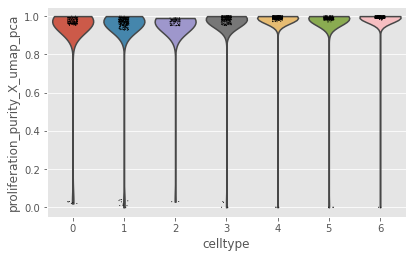

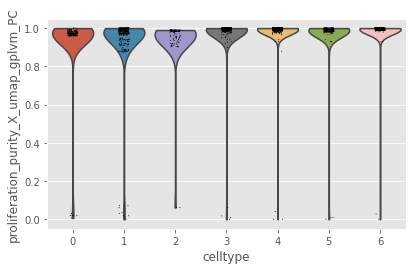

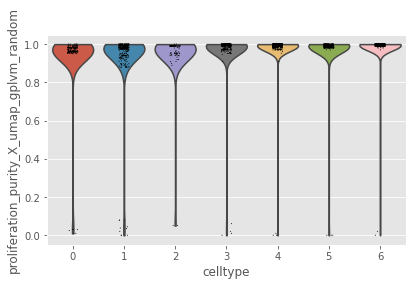

In [65]:
sc.pl.violin(forebrain, 'proliferation_purity_X_umap_pca', groupby='celltype')
sc.pl.violin(forebrain, 'proliferation_purity_X_umap_gplvm_PC', groupby='celltype')
sc.pl.violin(forebrain, 'proliferation_purity_X_umap_gplvm_random', groupby='celltype')

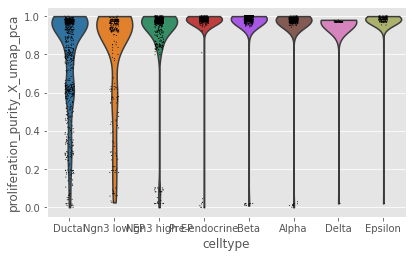

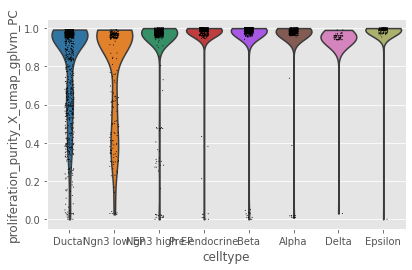

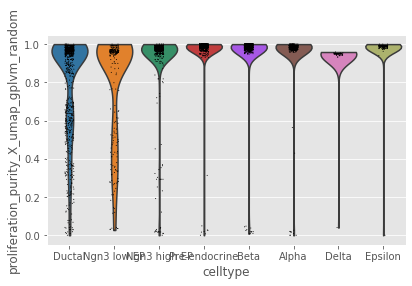

In [66]:
sc.pl.violin(pancreas, 'proliferation_purity_X_umap_pca', groupby='celltype')
sc.pl.violin(pancreas, 'proliferation_purity_X_umap_gplvm_PC', groupby='celltype')
sc.pl.violin(pancreas, 'proliferation_purity_X_umap_gplvm_random', groupby='celltype')

In [68]:
cc_purity_data_plk1= pd.DataFrame(columns=['score','condition', 'dataset'])
datasets=[ pancreas, forebrain]
datasets_names=['pancreas', 'forebrain']
conditions=['proliferation_purity_X_umap_pca','proliferation_purity_X_umap_gplvm_PC','proliferation_purity_X_umap_gplvm_random']
condition_names=['PCA', "gplvm_PCA", "gplvm_random"]
for i in range(len(datasets)):
    for j in range(len(conditions)):
        tempdf= pd.DataFrame(columns=['score','condition', 'dataset'])
        tempdf['score']= datasets[i].obs[conditions[j]]
        tempdf['condition']= condition_names[j]
        tempdf['dataset']= datasets_names[i]
        cc_purity_data_plk1 = pd.concat([cc_purity_data_plk1,tempdf])  


In [69]:
def TTest_CCN(adata, name_dataset):
    
    '''
    calculates the t-test scores to get an idea of the agreement between clusters based on ground truth (celltype in obs) 
    and the clusters obtained via PCA and laent variable UMAPs..(??)
    '''
    input=[['randomVsPCInit'],['randomVsPCA'],['PCAvsPCAInit']]
    input[0].append((scipy.stats.ttest_ind(adata.obs['proliferation_purity_X_umap_gplvm_PC'], adata.obs['proliferation_purity_X_umap_gplvm_random'])[1]))
    input[1].append(scipy.stats.ttest_ind(adata.obs['proliferation_purity_X_umap_pca'], adata.obs['proliferation_purity_X_umap_gplvm_random'])[1])
    input[2].append(scipy.stats.ttest_ind(adata.obs['proliferation_purity_X_umap_pca'], adata.obs['proliferation_purity_X_umap_gplvm_PC'])[1])
    S=pd.DataFrame(input, columns=['condition', 'score'] )
    S['dataset']= name_dataset
                                                   
    return S



In [70]:
ds = [forebrain, pancreas]
names= ['forebrain', 'pancreas']
TT_DF= pd.DataFrame(columns=['condition', 'score', 'dataset'] )
for i in range(len(ds)):
    adata = ds[i]
    name= names[i]
    TTestScores = TTest_CCN(adata, name)
    TT_DF= pd.concat([TT_DF, TTestScores]) 

In [71]:
TT_DF

,condition,score,dataset
0,randomVsPCInit,0.922153,forebrain
1,randomVsPCA,0.886729,forebrain
2,PCAvsPCAInit,0.964245,forebrain
0,randomVsPCInit,0.917516,pancreas
1,randomVsPCA,0.317101,pancreas
2,PCAvsPCAInit,0.267782,pancreas


In [72]:
# cc_purity_data_plk1.to_csv('cc_purity_data_plk1.csv')
# TT_DF.to_csv('cc_purity_TTest_plk1.csv')

CENPF- M Phase

In [75]:
datasets1=[ pancreas]
datasets2=[forebrain, pbmc10k]
for i in range(len(datasets1)):
    proliferation_purity(datasets1[i], "X_umap_pca", 'Cenpf')
    proliferation_purity(datasets1[i], "X_umap_gplvm_random", 'Cenpf')
    proliferation_purity(datasets1[i], "X_umap_gplvm_PC", 'Cenpf')
for i in range(len(datasets2)):
    proliferation_purity(datasets2[i], "X_umap_pca", 'CENPF')
    proliferation_purity(datasets2[i], "X_umap_gplvm_PC", 'CENPF')
    proliferation_purity(datasets2[i], "X_umap_gplvm_random", 'CENPF')



forebrain.obs['celltype'] = pd.Categorical(forebrain.obs.celltype)
(forebrain.obs.dtypes)

sc.pl.violin(forebrain, 'proliferation_purity_X_umap_pca', groupby='celltype')
sc.pl.violin(forebrain, 'proliferation_purity_X_umap_gplvm_PC', groupby='celltype')
sc.pl.violin(forebrain, 'proliferation_purity_X_umap_gplvm_random', groupby='celltype')

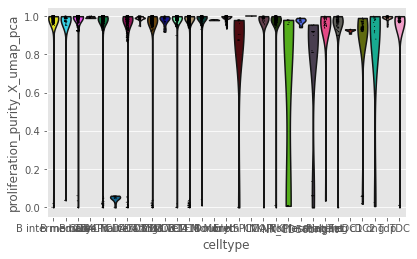

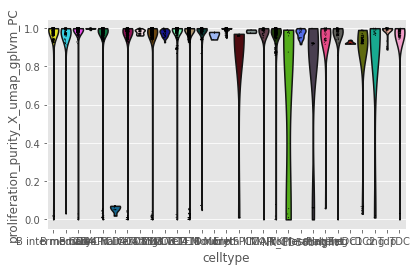

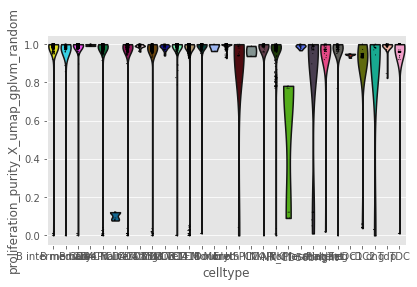

In [76]:
sc.pl.violin(pbmc10k, 'proliferation_purity_X_umap_pca', groupby='celltype')
sc.pl.violin(pbmc10k, 'proliferation_purity_X_umap_gplvm_PC', groupby='celltype')
sc.pl.violin(pbmc10k, 'proliferation_purity_X_umap_gplvm_random', groupby='celltype')

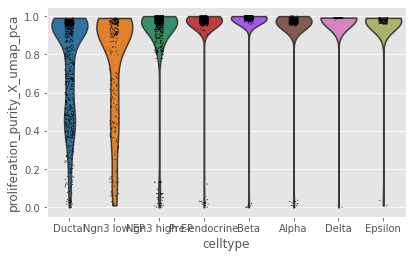

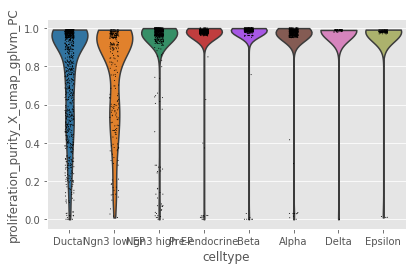

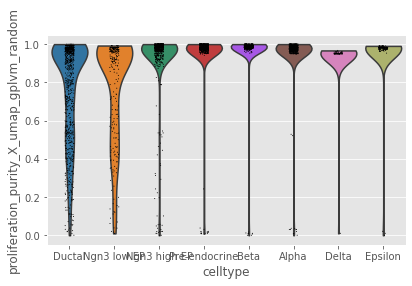

In [77]:
sc.pl.violin(pancreas, 'proliferation_purity_X_umap_pca', groupby='celltype')
sc.pl.violin(pancreas, 'proliferation_purity_X_umap_gplvm_PC', groupby='celltype')
sc.pl.violin(pancreas, 'proliferation_purity_X_umap_gplvm_random', groupby='celltype')

In [78]:
forebrain

AnnData object with n_obs × n_vars = 1720 × 2454
    obs: 'Clusters', 'cellcycle_pseudotime', 'clusters_gplvm_PcaInit', 'clusters_PC', 'clusters_gplvm_randomInit', 'celltype', 'knn_purity_X_umap_pca', 'knn_purity_X_umap_gplvm_random', 'knn_purity_X_umap_gplvm_PC', 'profliferation_purity_X_umap_pca', 'proliferation_purity_X_umap_pca', 'profliferation_purity_X_umap_gplvm_PC', 'proliferation_purity_X_umap_gplvm_PC', 'profliferation_purity_X_umap_gplvm_random', 'proliferation_purity_X_umap_gplvm_random'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'PCA', 'gplvm_PCA', 'hvg', 'leiden', 'likelihood_state_dict', 'model_state_dict', 'pca', 'umap', 'knnpurity', 'prolif_purity', 'celltype_colors'
    obsm: 'X_BGPLVM_latent', 'X_pca', 'X_umap', 'X_umap_gplvm_PC', 'X_umap_gplvm_random', 'X_umap_pca'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'PCA_connectivities', 'PCA_dis

In [81]:
cc_purity_data_cenpf= pd.DataFrame(columns=['score','condition', 'dataset'])
datasets=[ pancreas, forebrain, pbmc10k]
datasets_names=['pancreas', 'forebrain', 'pbmc10k']
conditions=['proliferation_purity_X_umap_pca','proliferation_purity_X_umap_gplvm_PC','proliferation_purity_X_umap_gplvm_random']
condition_names=['PCA', "gplvm_PCA", "gplvm_random"]
for i in range(len(datasets)):
    for j in range(len(conditions)):
        tempdf= pd.DataFrame(columns=['score','condition', 'dataset'])
        tempdf['score']= datasets[i].obs[conditions[j]]
        tempdf['condition']= condition_names[j]
        tempdf['dataset']= datasets_names[i]
        cc_purity_data_cenpf= pd.concat([cc_purity_data_cenpf,tempdf])  



Top2A-GPhase

In [92]:
datasets1=[ pancreas]
datasets2=[forebrain, pbmc10k, pbmc3k]
for i in range(len(datasets1)):
    proliferation_purity(datasets1[i], "X_umap_pca", 'Top2a')
    proliferation_purity(datasets1[i], "X_umap_gplvm_random", 'Top2a')
    proliferation_purity(datasets1[i], "X_umap_gplvm_PC", 'Top2a')
for i in range(len(datasets2)):
    proliferation_purity(datasets2[i], "X_umap_pca", 'TOP2A')
    proliferation_purity(datasets2[i], "X_umap_gplvm_PC", 'TOP2A')
    proliferation_purity(datasets2[i], "X_umap_gplvm_random", 'TOP2A')




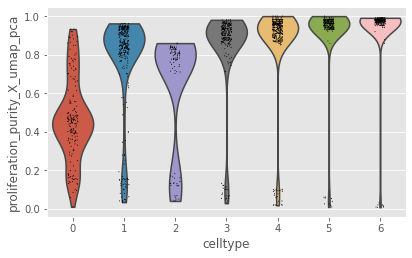

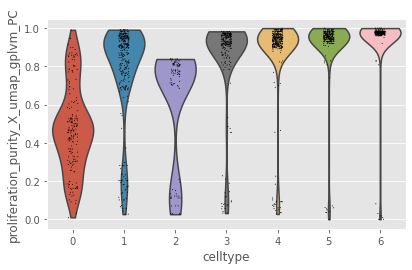

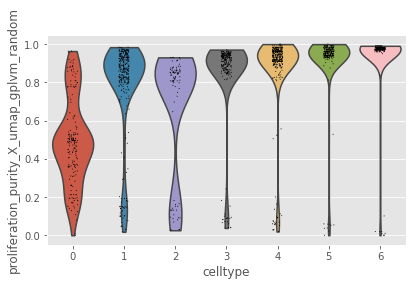

In [88]:
forebrain.obs['celltype'] = pd.Categorical(forebrain.obs.celltype)
(forebrain.obs.dtypes)

sc.pl.violin(forebrain, 'proliferation_purity_X_umap_pca', groupby='celltype')
sc.pl.violin(forebrain, 'proliferation_purity_X_umap_gplvm_PC', groupby='celltype')
sc.pl.violin(forebrain, 'proliferation_purity_X_umap_gplvm_random', groupby='celltype')

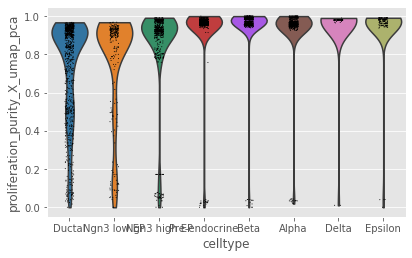

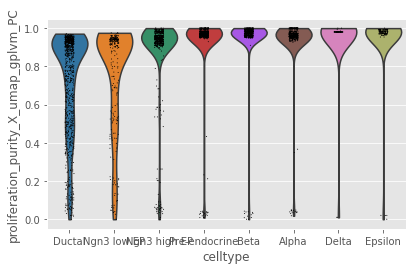

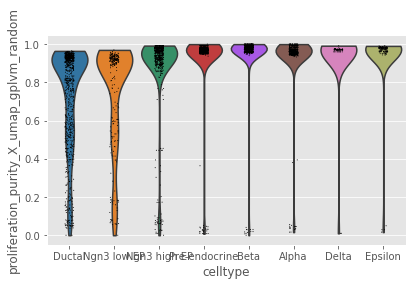

In [89]:
sc.pl.violin(pancreas, 'proliferation_purity_X_umap_pca', groupby='celltype')
sc.pl.violin(pancreas, 'proliferation_purity_X_umap_gplvm_PC', groupby='celltype')
sc.pl.violin(pancreas, 'proliferation_purity_X_umap_gplvm_random', groupby='celltype')

In [93]:
cc_purity_data_top2a= pd.DataFrame(columns=['score','condition', 'dataset'])
datasets=[ pancreas, forebrain, pbmc10k, pbmc3k]
datasets_names=['pancreas', 'forebrain', 'pbmc10k', "pbmc3k"]
conditions=['proliferation_purity_X_umap_pca','proliferation_purity_X_umap_gplvm_PC','proliferation_purity_X_umap_gplvm_random']
condition_names=['PCA', "gplvm_PCA", "gplvm_random"]
for i in range(len(datasets)):
    for j in range(len(conditions)):
        tempdf= pd.DataFrame(columns=['score','condition', 'dataset'])
        tempdf['score']= datasets[i].obs[conditions[j]]
        tempdf['condition']= condition_names[j]
        tempdf['dataset']= datasets_names[i]
        cc_purity_data_top2a= pd.concat([cc_purity_data_top2a,tempdf])  




CDK1- G2 Phase

In [94]:
datasets1=[ pancreas]
datasets2=[forebrain]
for i in range(len(datasets1)):
    proliferation_purity(datasets1[i], "X_umap_pca", 'Cdk1')
    proliferation_purity(datasets1[i], "X_umap_gplvm_random", 'Cdk1')
    proliferation_purity(datasets1[i], "X_umap_gplvm_PC", 'Cdk1')
for i in range(len(datasets2)):
    proliferation_purity(datasets2[i], "X_umap_pca", 'CDK1')
    proliferation_purity(datasets2[i], "X_umap_gplvm_PC", 'CDK1')
    proliferation_purity(datasets2[i], "X_umap_gplvm_random", 'CDK1')

cc_purity_data_cdk1= pd.DataFrame(columns=['score','condition', 'dataset'])
datasets=[ pancreas, forebrain]
datasets_names=['pancreas', 'forebrain', 'pbmc10k', "pbmc3k"]
conditions=['proliferation_purity_X_umap_pca','proliferation_purity_X_umap_gplvm_PC','proliferation_purity_X_umap_gplvm_random']
condition_names=['PCA', "gplvm_PCA", "gplvm_random"]
for i in range(len(datasets)):
    for j in range(len(conditions)):
        tempdf= pd.DataFrame(columns=['score','condition', 'dataset'])
        tempdf['score']= datasets[i].obs[conditions[j]]
        tempdf['condition']= condition_names[j]
        tempdf['dataset']= datasets_names[i]
        cc_purity_data_cdk1= pd.concat([cc_purity_data_cdk1,tempdf])  




In [95]:
cc_purity_data_plk1["Gene"]= "PLK1"
cc_purity_data_cenpf["Gene"]= "CENPF"
cc_purity_data_top2a["Gene"]= "TOP2A"
cc_purity_data_cdk1["Gene"]= "CDK1"
FinalDf= pd.concat([cc_purity_data_plk1, cc_purity_data_cenpf]) 
FinalDf= pd.concat([FinalDf, cc_purity_data_top2a]) 
FinalDf= pd.concat([FinalDf, cc_purity_data_cdk1]) 

In [101]:
cc_purity_data_top2a

,score,condition,dataset,Gene
AAACCTGAGAGGGATA,0.967480,PCA,pancreas,TOP2A
AAACCTGAGCCTTGAT,0.952756,PCA,pancreas,TOP2A
AAACCTGAGGCAATTA,1.000000,PCA,pancreas,TOP2A
AAACCTGCATCATCCC,0.384615,PCA,pancreas,TOP2A
AAACCTGGTAAGTGGC,0.980952,PCA,pancreas,TOP2A
...,...,...,...,...
TTTGTCTAGTCTATGA-1,1.000000,gplvm_random,pbmc3k,TOP2A
TTTGTGGCAGCACGAA-1,1.000000,gplvm_random,pbmc3k,TOP2A
TTTGTGGCATCGCTCC-1,1.000000,gplvm_random,pbmc3k,TOP2A
TTTGTGTTCACTTCAT-1,1.000000,gplvm_random,pbmc3k,TOP2A


In [100]:
cc_purity_data_cdk1

,score,condition,dataset,Gene
AAACCTGAGAGGGATA,0.983740,PCA,pancreas,CDK1
AAACCTGAGCCTTGAT,0.795276,PCA,pancreas,CDK1
AAACCTGAGGCAATTA,0.954128,PCA,pancreas,CDK1
AAACCTGCATCATCCC,0.490385,PCA,pancreas,CDK1
AAACCTGGTAAGTGGC,0.990476,PCA,pancreas,CDK1
...,...,...,...,...
10X_17_029:TTTATGCGTTGCGCACx,0.705036,gplvm_random,forebrain,CDK1
10X_17_029:TTTGCGCGTTCCGTCTx,0.989899,gplvm_random,forebrain,CDK1
10X_17_029:TTTGGTTGTACCCAATx,1.000000,gplvm_random,forebrain,CDK1
10X_17_029:TTTCCTCCAGTCCTTCx,0.585859,gplvm_random,forebrain,CDK1


In [102]:
FinalDf.to_csv("CC_Purity.csv")

### Example conversion to R for plotting

You will need to install the `rpy2` package from terminal:
```
pip install rpy2
```

In [51]:
cd

/home/jupyter


In [54]:
#pip install rpy2

OSError: [Errno 12] Cannot allocate memory

In [45]:
## r2py setup
import rpy2.rinterface_lib.callbacks
import logging
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

Run the chunk below separately to enable the use of R chunks

In [46]:
%load_ext rpy2.ipython

In [135]:
adata= scv.datasets.pancreas()

In [136]:
knn_purity(adata, "X_pca", 'clusters_coarse')

Now whenever you need you can run some R code, by starting the chunk with a line containing `%%R`, for example:

In [47]:
%%R
library(tidyverse)
library(patchwork)


Error in library(tidyverse) : there is no package called ‘tidyverse’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library


In [138]:
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'knn_purity_X_pca'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'knnpurity'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities', 'knnpurity_distances', 'knnpurity_connectivities'

If you want to pass an object you have in python to be used in an R chunk you can add the `-i` option to the initial line. For example, if we have a pandas DataFrame like below

In [51]:
knn_purity_df = adata.obs[['knn_purity_X_pca', 'clusters_coarse']].copy()
knn_purity_df

,knn_purity_X_pca,clusters_coarse
index,,
AAACCTGAGAGGGATA,0.520000,Pre-endocrine
AAACCTGAGCCTTGAT,0.833935,Ductal
AAACCTGAGGCAATTA,0.854545,Endocrine
AAACCTGCATCATCCC,0.955357,Ductal
AAACCTGGTAAGTGGC,0.619048,Ngn3 high EP
...,...,...
TTTGTCAAGTGACATA,0.846154,Pre-endocrine
TTTGTCAAGTGTGGCA,0.991597,Ngn3 high EP
TTTGTCAGTTGTTTGG,0.903509,Ductal


We can pass it to R (**one word of caution:** the jupyter notebook interface doesn't know how to handle your R data well, e.g. if you just run `knn_purity_df` it will print _the whole_ dataframe and take ages to finish :D)

In [48]:
%%R -i cc_purity_data_cenpf
head(cc_purity_data_cenpf)

[1] score     condition dataset  
<0 rows> (or 0-length row.names)


and now we can use it in all the following R chunks

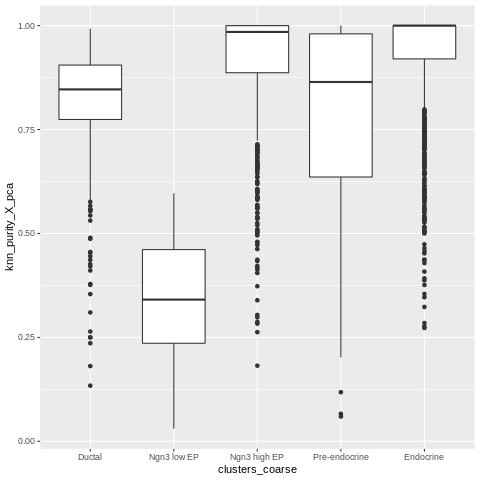

In [53]:
%%R 
knn_purity_df %>%
ggplot(aes(clusters_coarse, knn_purity_X_pca)) +
geom_boxplot()

If you want to modify a dataset in R and move it back to python you can use the `-o` option

In [106]:
%%R -o knn_purity_duct_df
knn_purity_duct_df <- knn_purity_df %>%
    filter(clusters_coarse=="Ductal")

In [107]:
knn_purity_duct_df

,knn_purity_X_pca,clusters_coarse
AAACCTGAGCCTTGAT,0.833935,Ductal
AAACCTGCATCATCCC,0.955357,Ductal
AAACCTGGTATTAGCC,0.887500,Ductal
AAACCTGTCTTTCCTC,0.875000,Ductal
AAACGGGAGACAATAC,0.934783,Ductal
...,...,...
TTTGCGCAGACAGACC,0.832117,Ductal
TTTGCGCGTCCAGTGC,0.725490,Ductal
TTTGGTTCAAAGCGGT,0.954198,Ductal
TTTGGTTCACCAGATT,0.792000,Ductal


You can adjust the display size for figures in the notebook using the `-w` and `-h` options

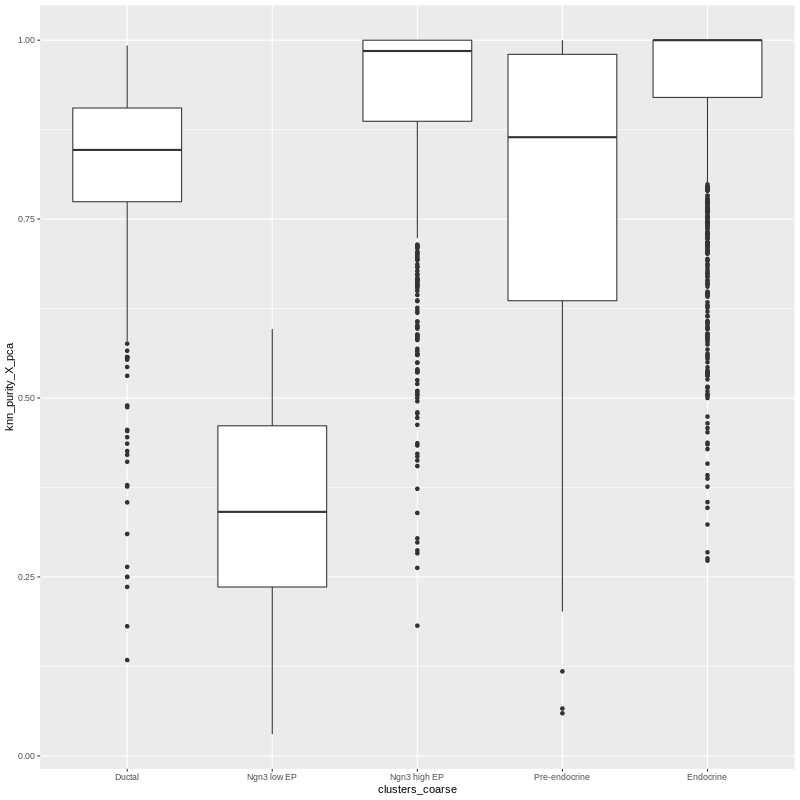

In [108]:
%%R -w 800 -h 800
knn_purity_df %>%
ggplot(aes(clusters_coarse, knn_purity_X_pca)) +
geom_boxplot()

In [80]:
knnpurity_data

,knn,condition,dataset
AAACCTGAGAGGGATA,0.881188,PCA,pancreas
AAACCTGAGCCTTGAT,0.842593,PCA,pancreas
AAACCTGAGGCAATTA,0.695238,PCA,pancreas
AAACCTGCATCATCCC,0.806202,PCA,pancreas
AAACCTGGTAAGTGGC,0.723810,PCA,pancreas
...,...,...,...
Run5_241114589051630,0.850000,gplvm_random,bonemarrow
Run5_241114589051819,0.574257,gplvm_random,bonemarrow
Run5_241114589128940,0.060000,gplvm_random,bonemarrow
Run5_241114589357942,0.964789,gplvm_random,bonemarrow


In [82]:
%%R -i knnpurity_data
head(knnpurity_data)

        knn condition  dataset
1 0.8811881       PCA pancreas
2 0.8425926       PCA pancreas
3 0.6952381       PCA pancreas
4 0.8062016       PCA pancreas
5 0.7238095       PCA pancreas
6 0.9174312       PCA pancreas


In [49]:
%%R  cc_plot=ggplot(
  data =cc_purity_data_cenpf,
  mapping = aes(x = as.factor(condition), y = score, fill = dataset)) +
  geom_boxplot(outlier.shape = NA) +
      theme_classic() + 
    scale_x_discrete(limits = levels(knnpurity_data$dataset)) +
      ylab("KNN purity") +
    xlab("Assay Used")



Error in ggplot(data = cc_purity_data_cenpf, mapping = aes(x = as.factor(condition),  : 
  could not find function "ggplot"
Calls: <Anonymous> -> <Anonymous> -> withVisible


In [21]:
knnpurity_data.to_csv('/home/jupyter/GPLVM_Shaista/knnPurity.csv')

In [87]:
pwd

'/home/jovyan'

In [92]:
df = pd.read_csv ('/home/jovyan/GPLVM_Shaista/ARI_NMI.csv')


In [142]:
RandScore=df[df["Metric"] == "ARI"]

In [197]:
NMI=df[df["Metric"] == "NMI"]

In [198]:
NMI

,Unnamed: 0,condition,score,dataset,Metric
18,0,NMI_random_init,0.559229,gastrulation,NMI
19,1,NMI_gplvm_init,0.755076,gastrulation,NMI
20,2,NMI_pca,0.694095,gastrulation,NMI
21,0,NMI_random_init,0.533229,bonemarrow,NMI
22,1,NMI_gplvm_init,0.537350,bonemarrow,NMI
23,2,NMI_pca,0.631125,bonemarrow,NMI
24,0,NMI_random_init,0.632026,forebrain,NMI
25,1,NMI_gplvm_init,0.567295,forebrain,NMI
26,2,NMI_pca,0.683863,forebrain,NMI
27,0,NMI_random_init,0.580684,pancreas,NMI


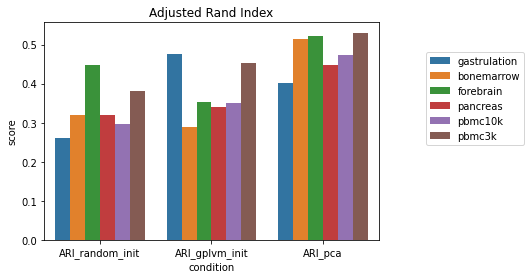

In [199]:
ax = sns.barplot(x="condition", y="score", hue="dataset",
                 data=RandScore, linewidth=2.5)
#plt.legend(loc='upper left')
plt.title("Adjusted Rand Index")
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=3.)


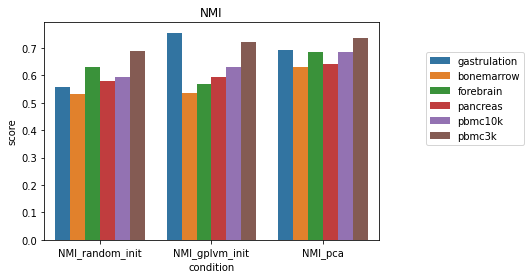

In [200]:
nmi = sns.barplot(x="condition", y="score", hue="dataset",
                 data=NMI, linewidth=2.5)
#plt.legend(loc='upper left')
plt.title("NMI")
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=3.)

In [201]:
%%R -i RandScore
str(RandScore)

'data.frame':	18 obs. of  5 variables:
 $ Unnamed: 0: int  0 1 2 0 1 2 0 1 2 0 ...
 $ condition : chr  "ARI_random_init" "ARI_gplvm_init" "ARI_pca" "ARI_random_init" ...
 $ score     : num  0.261 0.476 0.401 0.32 0.29 ...
 $ dataset   : chr  "gastrulation" "gastrulation" "gastrulation" "bonemarrow" ...
 $ Metric    : chr  "ARI" "ARI" "ARI" "ARI" ...


In [203]:
%%R -i NMI
str(NMI)

'data.frame':	18 obs. of  5 variables:
 $ Unnamed: 0: int  0 1 2 0 1 2 0 1 2 0 ...
 $ condition : chr  "NMI_random_init" "NMI_gplvm_init" "NMI_pca" "NMI_random_init" ...
 $ score     : num  0.559 0.755 0.694 0.533 0.537 ...
 $ dataset   : chr  "gastrulation" "gastrulation" "gastrulation" "bonemarrow" ...
 $ Metric    : chr  "NMI" "NMI" "NMI" "NMI" ...


In [204]:
%%R 

  p1=ggplot(RandScore, aes(condition,score, fill=dataset))+
  geom_col(position="dodge") +
  labs(title="Adjusted Rand Score",
        x="Condition", y= "Score")
     p2=ggplot(NMI, aes(condition,score, fill=dataset))+
  geom_col(position="dodge") +
  labs(title="NMI",
        x="Condition", y= "Score")

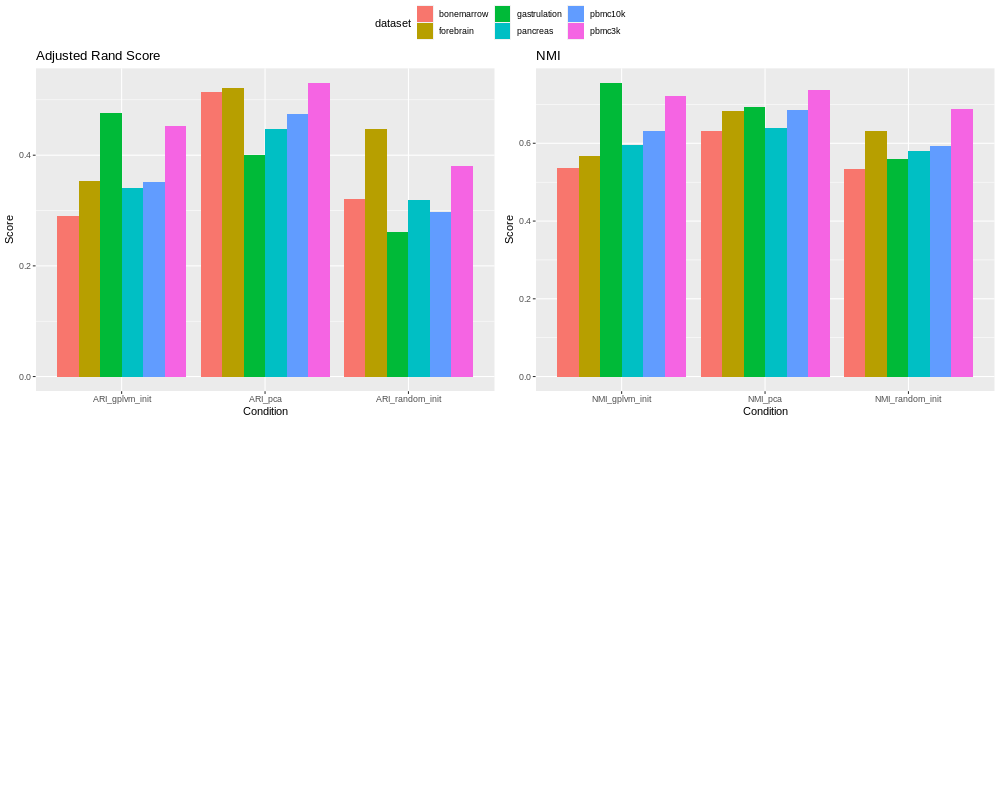

In [226]:
%%R -w 1000 -h 800
library(ggpubr)
NMI_ARIPlot=ggarrange(p1, p2, ncol=2, nrow=2, common.legend = TRUE, legend="top")
NMI_ARIPlot+scale_color_brewer(palette="Dark2")

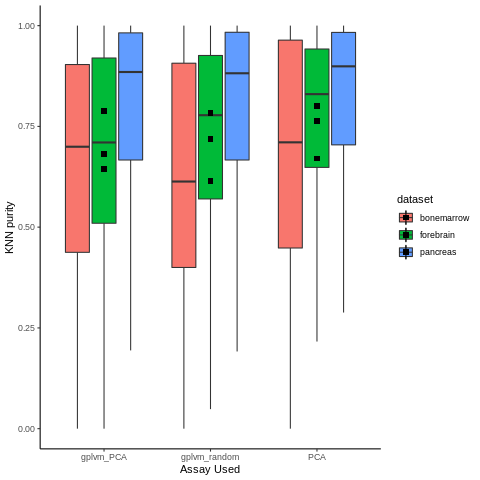

In [227]:
%%R
knn_plot+scale_color_brewer(palette="Dark2")

In [245]:
%%R 
library(ggpubr)
 S=ggarrange(NMI_ARIPlot, knn_plot, 
           labels = c("A", "B"),
             
           ncol = 1, nrow = 2, heights = c(3,1))

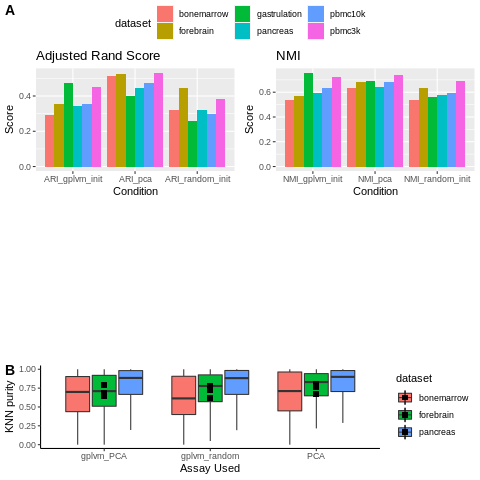

In [264]:
%%R 
S

In [252]:
%%R 
library(ggpubr)
png(file = "/home/jovyan/GPLVM_Shaista/Figure2.png",width=600, height=350) 
S
 
dev.off()

png 
  2 
